# 서울 특별시 공공 자전거 이용정보 (월별) 

* 데이터 측정 기간 : 24.07 ~ 24.12

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv("data/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding = "cp949")

# 2. 데이터 정보 확인하기

In [3]:
print(df.head())
print(df.info())
df

     대여일자  대여소번호             대여소명 대여구분코드   성별 연령대코드  이용건수      운동량    탄소량  \
0  202407    102  102. 망원역 1번출구 앞    일일권  NaN   20대    67  4304.28  40.87   
1  202407    102  102. 망원역 1번출구 앞    일일권  NaN   30대    64  4142.09  38.92   
2  202407    102  102. 망원역 1번출구 앞    일일권  NaN   40대     2   265.91   2.11   
3  202407    102  102. 망원역 1번출구 앞    일일권  NaN   50대     6   648.52   5.11   
4  202407    102  102. 망원역 1번출구 앞    일일권  NaN   60대     1    35.37   0.31   

     이동거리(M)  이용시간(분)  
0  176252.62     1895  
1  167774.15     1498  
2    9098.64       64  
3   22048.26      149  
4    1333.18        6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80


## 1) 데이터 형 변환

In [4]:
# .astype()

df = df.astype({"대여소번호" : 'object', "대여일자" : 'object'})
#df["대여일자"] = pd.to_datetime(df["대여일자"], format = "%Y%m")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  object 
 1   대여소번호    619664 non-null  object 
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 52.0+ MB
None


## 2) 카테고리 변수 unique 확인하기

In [5]:
# .unique(), .nunique()

print(df["성별"].nunique())
print(df["성별"].unique())
print(df["대여일자"].nunique())
print(df["대여일자"].unique())
print(df["연령대코드"].nunique())
print(df["연령대코드"].unique())

4
[nan 'F' 'M' 'm' 'f']
6
[202407 202408 202409 202410 202411 202412]
8
['20대' '30대' '40대' '50대' '60대' '기타' '~10대' '70대이상']


* 성별 결측치 -> 응답하지 않은 경우.
* 대문자, 소문자가 섞여 있다. -> 대문자로 변환
* 성별 결측치는 O (other) 으로 변환

In [6]:
df["성별"] = df["성별"].str.upper()
df["성별"] = df["성별"].fillna("O")

print(df["성별"].nunique())
print(df["성별"].unique())

3
['O' 'F' 'M']


In [7]:
print(df.describe())

                이용건수            운동량            탄소량       이동거리(M)  \
count  619664.000000  619269.000000  619269.000000  6.196640e+05   
mean       36.207324    2171.806347      18.868742  8.161182e+04   
std        68.309988    4094.071706      34.935409  1.511538e+05   
min         1.000000       0.000000       0.000000  0.000000e+00   
25%         4.000000     221.250000       2.010000  8.705685e+03   
50%        12.000000     773.460000       6.950000  3.007392e+04   
75%        39.000000    2391.900000      21.140000  9.141029e+04   
max      2454.000000  271725.720000    2652.600000  1.154394e+07   

             이용시간(분)  
count  619664.000000  
mean      741.158513  
std      1343.878371  
min         0.000000  
25%        81.000000  
50%       274.000000  
75%       827.000000  
max     95970.000000  


# 3. 결측치 확인하기

In [8]:
print(df.isna())

         대여일자  대여소번호   대여소명  대여구분코드     성별  연령대코드   이용건수    운동량    탄소량  \
0       False  False  False   False  False  False  False  False  False   
1       False  False  False   False  False  False  False  False  False   
2       False  False  False   False  False  False  False  False  False   
3       False  False  False   False  False  False  False  False  False   
4       False  False  False   False  False  False  False  False  False   
...       ...    ...    ...     ...    ...    ...    ...    ...    ...   
619659  False  False  False   False  False  False  False  False  False   
619660  False  False  False   False  False  False  False  False  False   
619661  False  False  False   False  False  False  False  False  False   
619662  False  False  False   False  False  False  False  False  False   
619663  False  False  False   False  False  False  False  False  False   

        이동거리(M)  이용시간(분)  
0         False    False  
1         False    False  
2         False    False  
3  

In [9]:
print(df.isna().sum(axis=0))

대여일자         0
대여소번호        0
대여소명         0
대여구분코드       0
성별           0
연령대코드        0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64


# 4. 데이터 탐색

## 1) 새로운 열 만들기

In [10]:
# 건당 이동거리 (M), 건당 이용시간(분) 열을 추가
# 건당 이동거리 (M) = 이동거리(M) / 이용건수
# 건당 이용시간 (분) = 이용시간(분) / 이용건수

df["건당 이동거리(M)"] = df["이동거리(M)"] / df["이용건수"]
df["건당 이용시간(분)"] = df["이용시간(분)"] / df["이용건수"]

df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


## 2) 데이터 요약하기

In [11]:
df.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000,619664.000000,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513,2701.308303,24.522191
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371,2035.965154,17.922810
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000,1504.471840,13.866667
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000,2138.456549,20.300000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000,3235.145285,30.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000,74198.100000,863.000000


## 3) 시각화

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib

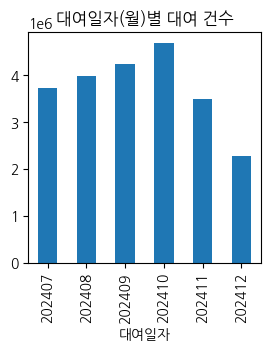

In [13]:
x_data = df.groupby("대여일자")["이용건수"].sum()

plt.figure(figsize=(3,3))
x_data.plot(kind = "bar")
plt.title("대여일자(월)별 대여 건수")
plt.show()

In [14]:
# 성별 평균 이동거리, 평균 이용시간

y_data = df.groupby("성별")[["건당 이동거리(M)", "건당 이용시간(분)"]].agg(func = ["min", "mean", "max"])

y_data

건당 이동거리(M)                        건당 이용시간(분)                  
          min         mean       max        min       mean    max
성별                                                               
F         0.0  2684.818708  72120.00        0.0  25.761345  863.0
M         0.0  2668.111610  74198.10        0.0  23.170525  818.0
O         0.0  2756.297323  63853.63        0.0  24.805885  858.0

In [15]:
# 연령대별 이용건수

usingTimes_per_age_data = df.groupby("연령대코드")[["이용건수"]].sum()

print(usingTimes_per_age_data)

          이용건수
연령대코드         
20대    6522094
30대    5787547
40대    3577567
50대    2482276
60대     833880
70대이상   135322
~10대   1515513
기타     1582176


In [16]:
# 대여소별 이용건수

usingTimes_per_place_data = df.groupby("대여소명")["이용건수"].sum()

print(usingTimes_per_place_data)

대여소명
1001. 광진교 남단 사거리(천호공원 방면)     9762
1002. 해공공원(천호동)              15322
1003. 해공도서관앞                  7385
1004. 삼성광나루아파트 버스정류장         10468
1006. 롯데캐슬 115동앞              1540
                             ...  
992.북한산입구 정류장                  993
993.은평뉴타운 은뜨락아파트앞             2097
994.북한산생태공원입구(교통섬)            1639
995.은평다목적체육관                  2544
996.응암역2번출구 국민은행 앞           22174
Name: 이용건수, Length: 2785, dtype: int64


<Figure size 300x300 with 0 Axes>

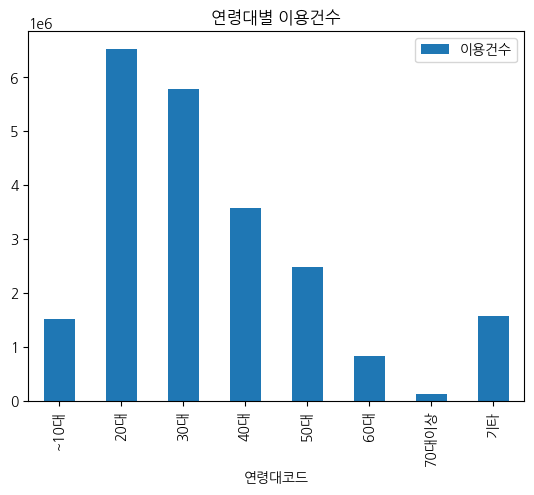

In [17]:
plt.figure(figsize=(3, 3))
usingTimes_per_age_data_index = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대이상', '기타']
usingTimes_per_age_data = usingTimes_per_age_data.loc[usingTimes_per_age_data_index]
usingTimes_per_age_data.plot(kind = "bar")
plt.title("연령대별 이용건수")
plt.show()

In [18]:
# 성별이 남자인 사람의 평균 이동 거리, 이용 시간

onlyMale_data = df[df["성별"] == "M"]
avg_distance_duration_male_data = onlyMale_data.groupby("성별")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()

avg_distance_duration_male_data["이동거리(M)"] = avg_distance_duration_male_data["이동거리(M)"] / avg_distance_duration_male_data["이용건수"]
avg_distance_duration_male_data["이용시간(분)"] = avg_distance_duration_male_data["이용시간(분)"] / avg_distance_duration_male_data["이용건수"]
avg_distance_duration_male_data.drop(labels = "이용건수", axis = 1, inplace = True)

print(avg_distance_duration_male_data)


        이동거리(M)    이용시간(분)
성별                        
M   2224.046649  19.664126


In [19]:
# 연령대 별 이동거리, 이용시간의 평균

avg_distance_duration_per_age_data = df.groupby("연령대코드")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()

avg_distance_duration_per_age_data["이동거리(M)"] = avg_distance_duration_per_age_data["이동거리(M)"] / avg_distance_duration_per_age_data["이용건수"]
avg_distance_duration_per_age_data["이용시간(분)"] = avg_distance_duration_per_age_data["이용시간(분)"] / avg_distance_duration_per_age_data["이용건수"]
avg_distance_duration_per_age_data.drop(labels = "이용건수", axis = 1, inplace = True)
avg_distance_duration_per_age_data

,이동거리(M),이용시간(분)
연령대코드,,
20대,2122.007369,18.638959
30대,2163.737586,19.624693
40대,2413.545647,22.199375
50대,2532.812616,23.058882
60대,2597.499107,26.077221
70대이상,2526.116243,27.746154
~10대,1929.615812,17.188689
기타,2436.695587,22.701329


# 4. 지도 시각화

In [20]:
import folium

loc_df = pd.read_csv("data/공공자전거 대여소 정보(api수집).csv", encoding = "utf-8")
print(loc_df.info())
print(loc_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA_LOC      3170 non-null   object 
 1   RENT_ID      3170 non-null   object 
 2   RENT_NO      3170 non-null   int64  
 3   RENT_NM      3170 non-null   object 
 4   RENT_ID_NM   3170 non-null   object 
 5   HOLD_NUM     3155 non-null   float64
 6   STA_ADD1     3170 non-null   object 
 7   STA_ADD2     1281 non-null   object 
 8   STA_LAT      3170 non-null   float64
 9   STA_LONG     3170 non-null   float64
 10  START_INDEX  3170 non-null   int64  
 11  END_INDEX    3170 non-null   int64  
 12  RNUM         3170 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 322.1+ KB
None
  STA_LOC  RENT_ID  RENT_NO       RENT_NM         RENT_ID_NM  HOLD_NUM  \
0     마포구    ST-10      108       서교동 사거리       108. 서교동 사거리      12.0   
1     광진구   ST-100      503   더샵스타시티 C동 앞   50

In [21]:
loc_df = loc_df.loc[: , ["RENT_NO", "RENT_ID_NM", "STA_LAT", "STA_LONG"]]
print(loc_df.head())
print(loc_df.info())

   RENT_NO         RENT_ID_NM    STA_LAT    STA_LONG
0      108       108. 서교동 사거리  37.552746  126.918617
1      503   503. 더샵스타시티 C동 앞  37.536667  127.073593
2      729   729. 서부식자재마트 건너편  37.510380  126.866798
3      731  731. 서울시 도로환경관리센터  37.529900  126.876541
4      732         732. 신월중학교  37.539551  126.828300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RENT_NO     3170 non-null   int64  
 1   RENT_ID_NM  3170 non-null   object 
 2   STA_LAT     3170 non-null   float64
 3   STA_LONG    3170 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 99.2+ KB
None


In [38]:
# 대여소번호, 대여소명, 위도, 경도 로 열 이름 변경

loc_df.columns = ['대여소번호', '대여소명', '위도', '경도']
print(loc_df.info())
loc_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   3170 non-null   int64  
 1   대여소명    3170 non-null   object 
 2   위도      3170 non-null   float64
 3   경도      3170 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 99.2+ KB
None


,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [23]:
# new_data 에서 대여소별로, 이동거리(M), 이용시간(분), 이용건수의 합 구하기 summary_data

summary_data = df.groupby("대여소명")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()
print(summary_data)

                               이동거리(M)  이용시간(분)   이용건수
대여소명                                                  
1001. 광진교 남단 사거리(천호공원 방면)  22579951.13   212018   9762
1002. 해공공원(천호동)            37190390.67   349509  15322
1003. 해공도서관앞               14033033.55   155349   7385
1004. 삼성광나루아파트 버스정류장       32114486.56   309776  10468
1006. 롯데캐슬 115동앞            2869819.58    26311   1540
...                                ...      ...    ...
992.북한산입구 정류장               3876214.34    28775    993
993.은평뉴타운 은뜨락아파트앞           3651995.73    37174   2097
994.북한산생태공원입구(교통섬)          2842205.41    24495   1639
995.은평다목적체육관                4923604.57    44168   2544
996.응암역2번출구 국민은행 앞         56014496.29   503169  22174

[2785 rows x 3 columns]


In [24]:
# summary_data에서 인덱스 리셋하기

summary_data.reset_index(inplace = True)

In [54]:
loc_df.loc[loc_df["대여소명"] == "108. 서교동 사거리", "위도"].values[0]
summary_data["대여소명"].tolist()

['1001. 광진교 남단 사거리(천호공원 방면)',
 '1002. 해공공원(천호동)',
 '1003. 해공도서관앞',
 '1004. 삼성광나루아파트 버스정류장',
 '1006. 롯데캐슬 115동앞',
 '1007.암사동 선사유적지',
 '1008. 암사역 3번출구(국민은행앞)',
 '1009. 천호역4번출구(현대백화점)',
 '1010. 강동세무서',
 '1011. LIGA 아파트 앞',
 '1012. 천호역효성해링턴타워 앞',
 '1013. 강동구청역 1번 출입구',
 '1015. 샛마을 근린공원',
 '1016. 해뜨는 주유소옆 리엔파크 109동앞',
 '1017. 둔촌고교입구 교차로(길동주민센터 방면)',
 '1018. 둔촌 주공 GS 맞은편',
 '1019. 다성이즈빌아파트(호원대 대각선 맞은편)',
 '102. 망원역 1번출구 앞',
 '1020. 강동경찰서',
 '1021. 강일동 리슈빌 빌딩앞',
 '1022. 길동 사거리(초소앞)',
 '1023. 한국종합기술사옥 앞',
 '1024.  강동구청 앞',
 '1025. 상일초등학교',
 '1027. 프라자 아파트 앞',
 '1028. 포레스 주상복합 빌딩',
 '1029. 성내어울터',
 '103. 망원역 2번출구 앞',
 '1030. 미호 플랜트 앞',
 '1031. 올림픽로 836(아리수로)',
 '1032. 선사고등학교',
 '1033. 고덕동 아남아파트',
 '1034. 고덕동 래미안 힐스테이트',
 '1036. 고덕동 주양쇼핑',
 '1037. 강일리버파크 6단지',
 '1038. 강일 다솜 어린이 공원',
 '1039. 고덕초등학교',
 '104. 합정역 1번출구 앞',
 '1041. 묘곡초등학교',
 '1042. 강일리버파크 2~5단지',
 '1044. 굽은다리역',
 '1048. 둔촌어린이공원',
 '1049. 강일리버파크 10단지',
 '105. 합정역 5번출구 앞',
 '1050.  둔촌역 3번 출입구',
 '1051. 강일중,선사고 버스정류장(신암중학교 방면)',
 '1053.

In [55]:
# 반복문 이해하기

lat_list = []  # 위도
long_list = [] # 경도

for name in summary_data["대여소명"].tolist():
    try:
        lat_value = loc_df.loc[loc_df["대여소명"] == name, "위도"].values[0]
        long_value = loc_df.loc[loc_df["대여소명"] == name, "경도"].values[0]

    except:
        lat_value = None
        long_value = None
        print("데이터를 찾을 수 없습니다.")
    
    lat_list.append(lat_value)
    long_list.append(long_value)
    
summary_data["위도"] = lat_list
summary_data["경도"] = long_list

summary_data    

데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.
데이터를 찾을 수 없습니다.


,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762,37.541794,127.124748
1,1002. 해공공원(천호동),37190390.67,349509,15322,37.545265,127.125938
2,1003. 해공도서관앞,14033033.55,155349,7385,37.543957,127.125488
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468,37.553329,127.128868
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540,37.554867,127.142799
...,...,...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993,37.658287,126.945297
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097,37.630287,126.919563
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639,37.610508,126.938538
2783,995.은평다목적체육관,4923604.57,44168,2544,37.631409,126.925407


In [56]:
# summary_data 에서 이동거리가 많은 순으로 Top10 뽑기

data_distance_top10 = summary_data.sort_values(by = ['이동거리(M)'], axis = 0, ascending = False).head(10)
print(data_distance_top10)
data_distance_top10


                         대여소명       이동거리(M)  이용시간(분)   이용건수         위도  \
1829         4217. 한강공원 망원나들목  3.539830e+08  2814405  65749  37.555576   
2301  502. 자양(뚝섬한강공원)역 1번출구 앞  2.455384e+08  2074352  63557  37.531860   
774         207. 여의나루역 1번출구 앞  2.027993e+08  1648615  39038  37.527157   
2459          583. 청계천 생태교실 앞  1.935874e+08  1235396  30419  37.567970   
2423            565. 옥수역 3번출구  1.932620e+08  1276284  29066  37.541367   
1193               272. 당산육갑문  1.804158e+08  1322940  34325  37.535339   
1188        2715.마곡나루역 2번 출구   1.395554e+08  1222774  98439  37.566925   
796             2102. 봉림교 교통섬  1.380883e+08  1009331  38268  37.484085   
178   1210. 롯데월드타워(잠실역2번출구 쪽)  1.274169e+08  1198697  61994  37.513126   
1409           3511. 응봉역 1번출구  1.208717e+08   832153  21577  37.551250   

              경도  
1829  126.896889  
2301  127.067192  
774   126.931900  
2459  127.046890  
2423  127.017761  
1193  126.903679  
1188  126.827438  
796   126.926888  
178   127.1009

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1409,3511. 응봉역 1번출구,1.208717e+08,832153,21577,37.551250,127.035103


In [57]:
# summary_data 에서 이용시간이 많은 순으로 Top10 뽑기

data_duration_top10 = summary_data.sort_values(by = ['이용시간(분)'], axis = 0, ascending = False).head(10)
print(data_duration_top10)

                         대여소명       이동거리(M)  이용시간(분)   이용건수         위도  \
1829         4217. 한강공원 망원나들목  3.539830e+08  2814405  65749  37.555576   
2301  502. 자양(뚝섬한강공원)역 1번출구 앞  2.455384e+08  2074352  63557  37.531860   
774         207. 여의나루역 1번출구 앞  2.027993e+08  1648615  39038  37.527157   
1193               272. 당산육갑문  1.804158e+08  1322940  34325  37.535339   
2423            565. 옥수역 3번출구  1.932620e+08  1276284  29066  37.541367   
2459          583. 청계천 생태교실 앞  1.935874e+08  1235396  30419  37.567970   
1188        2715.마곡나루역 2번 출구   1.395554e+08  1222774  98439  37.566925   
178   1210. 롯데월드타워(잠실역2번출구 쪽)  1.274169e+08  1198697  61994  37.513126   
796             2102. 봉림교 교통섬  1.380883e+08  1009331  38268  37.484085   
938          230. 영등포구청역 1번출구  7.260118e+07   946392  52836  37.524635   

              경도  
1829  126.896889  
2301  127.067192  
774   126.931900  
1193  126.903679  
2423  127.017761  
2459  127.046890  
1188  126.827438  
178   127.100960  
796   126.9268

In [58]:
# summary_data 에서 이용건수가 많은 순으로 Top10 뽑기

data_sev_top10 = summary_data.sort_values(by = ['이용건수'], axis = 0, ascending = False).head(10)
print(data_sev_top10)

                         대여소명       이동거리(M)  이용시간(분)   이용건수         위도  \
1188        2715.마곡나루역 2번 출구   1.395554e+08  1222774  98439  37.566925   
1200         2728.마곡나루역 3번 출구  9.318509e+07   752838  65977  37.565804   
1829         4217. 한강공원 망원나들목  3.539830e+08  2814405  65749  37.555576   
2301  502. 자양(뚝섬한강공원)역 1번출구 앞  2.455384e+08  2074352  63557  37.531860   
178   1210. 롯데월드타워(잠실역2번출구 쪽)  1.274169e+08  1198697  61994  37.513126   
1175      2701. 마곡나루역 5번출구 뒤편  6.483893e+07   529924  59768  37.565201   
124   1153. 발산역 1번, 9번 인근 대여소  8.286086e+07   750695  55671  37.558949   
938          230. 영등포구청역 1번출구  7.260118e+07   946392  52836  37.524635   
1428   3533. 건대입구역 사거리(롯데백화점)  8.230525e+07   864711  40457  37.539295   
101         1124. 발산역 6번 출구 뒤  5.854875e+07   599263  40233  37.558178   

              경도  
1188  126.827438  
1200  126.828079  
1829  126.896889  
2301  127.067192  
178   127.100960  
1175  126.827316  
124   126.837173  
938   126.896217  
1428  127.0707

<div>
    <img src="https://www.dropbox.com/scl/fi/3s8gvus21mqhcbqkz38zf/.png?rlkey=1kw3p6nleovg9dw6m82ik9izo&dl=1" width="50%">
</div>

In [59]:
import folium

# 지도 출력하기
center = [37.565516, 126.978025] # 중심 위치
map = folium.Map(location=center, zoom_start=12)
map

In [72]:
for i in range(len(data_distance_top10)):
    temp = data_distance_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="blue"), popup=data_distance_top10["대여소명"].values[i]).add_to(map)
map

In [73]:
for i in range(len(data_duration_top10)):
    temp = data_duration_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=data_duration_top10["대여소명"].values[i]).add_to(map)
map

In [81]:
for i in range(len(data_sev_top10)):
    temp = data_sev_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="green"), popup=("<pre>" + data_sev_top10["대여소명"].values[i] + "</pre>")).add_to(map)
map

In [29]:
import matplotlib.pyplot as plt

<Axes: >

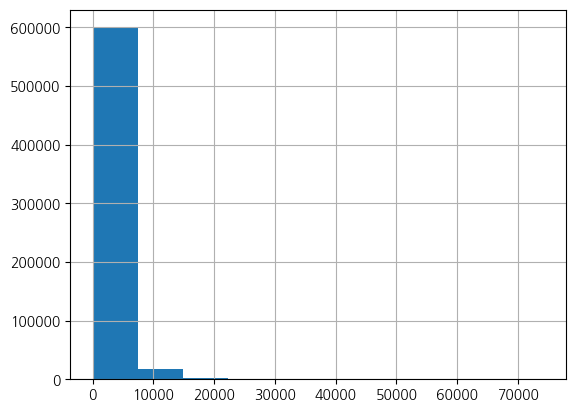

In [30]:
df["건당 이동거리(M)"].hist()

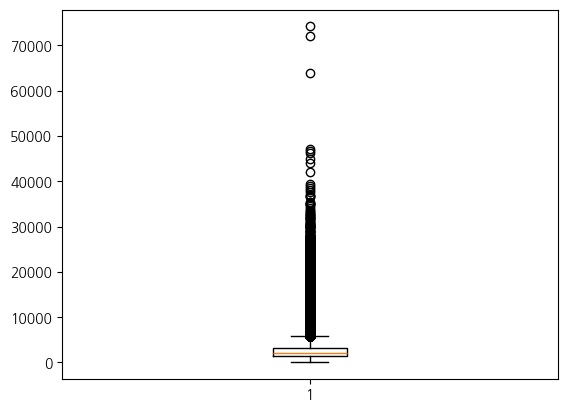

In [31]:
plt.boxplot(df["건당 이동거리(M)"])
plt.show()